In [6]:
train_real_folder = "../AIGC-Detection-Dataset/train/0_real"
train_fake_foledr = "../AIGC-Detection-Dataset/train/1_fake"

100%|██████████| 500/500 [00:02<00:00, 174.13it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


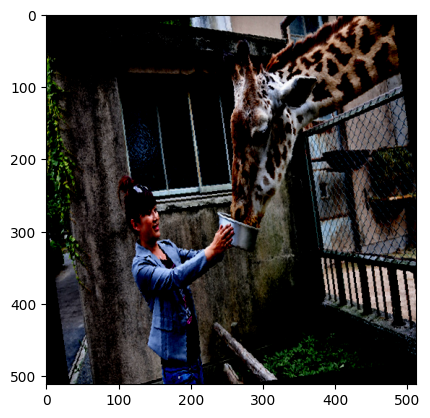

100%|██████████| 500/500 [00:01<00:00, 337.79it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


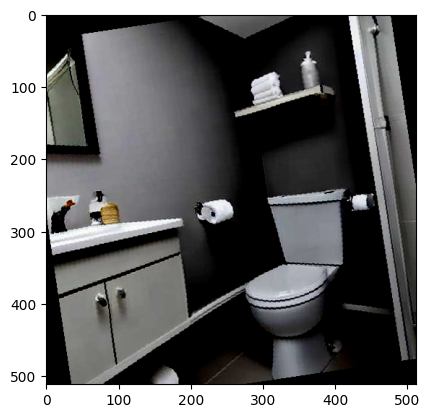

In [19]:
from tqdm import tqdm
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

def preprocess_image_with_augmentation(image_path, target_size=(512, 512)):
    # 定义数据增强的变换操作
    transform = transforms.Compose([
        transforms.Resize(target_size),  # 调整大小
        transforms.RandomHorizontalFlip(),  # 随机水平翻转
        transforms.RandomRotation(30),  # 随机旋转
        transforms.ToTensor(),  # 转换为Tensor
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # 归一化
    ])

    img = Image.open(image_path).convert('RGB')

    img = transform(img)

    return img


def preprocess_image(image_path, target_size=(512, 512)):
    # 打开图片
    img = Image.open(image_path)

    # 调整大小，确保图像是 512x512
    img = img.resize(target_size)

    # 转换为RGB模式（如果不是）
    if img.mode != 'RGB':
        img = img.convert('RGB')

    # 将图像转换为 numpy 数组
    img_array = np.array(img)

    # 归一化到 [0, 1]
    img_array = img_array / 255.0

    # 你也可以将其归一化到 [-1, 1]
    # img_array = (img_array / 127.5) - 1.0

    return img_array

# 加载并预处理数据
def load_and_preprocess_images(image_folder):
    image_data = []

    # 获取目录中的所有图片文件
    for filename in tqdm(os.listdir(image_folder)):
        image_path = os.path.join(image_folder, filename)
        if image_path.endswith('.jpg'):
            img = preprocess_image_with_augmentation(image_path)
            image_data.append(img)

    # 将所有图像数据转换为 numpy 数组
    return np.array(image_data)

train_real_images = load_and_preprocess_images(train_real_folder)
plt.imshow(np.transpose(train_real_images[0], (1, 2, 0)))
plt.show()

train_fake_images = load_and_preprocess_images(train_fake_foledr)
plt.imshow(np.transpose(train_fake_images[0], (1, 2, 0)))
plt.show()

